# Visualize Simulated Results

This notebook  can be used to plot the BLER results after running the evaluation scripts.

Running this notebook requires to run `scripts/evaluate.py`. All results from the evaluation scripts are stored in the `results` folder and are tagged with the corresponding `label`  as defined in the config file.

## GPU Configuration and Imports

Remark: Plotting itself does not need GPU/TensorFlow support.
However, the plotting function initializes the system parameters which would otherwise occupy all available GPUs.

In [1]:
# Suppress Tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        #tf.config.set_visible_devices([], 'GPU')
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

# Import libraries
import sys
sys.path.append('../') # to import utils
from utils import plot_results, plot_gp

%load_ext autoreload
%autoreload 2
%matplotlib inline

Number of GPUs available : 2
Only GPU number 0 used.


## Plot BLER results

The plotting function requires two parameters: the `config_name` and the `num_tx` to plot (must be evaluated for `num_tx` before).
However, there are a couple of additional features available:
- **feed matplotlib figure**: the figure will be updated with the selected BLER curves (helps to compare results from different config files)
- **set color offset**: line colors are taken from a list of available colors; 
- **select sim_idx**: feeding a list of indices which results should be plotted; e.g., if results for the NRX and the LS baseline have been simulated; setting `sim_idx=[1]` would only plot the LS baseline results.  
- **define custom labels**: per default the labels are taken from the system parameters. However, a list of strs can be provided to update the figure legend


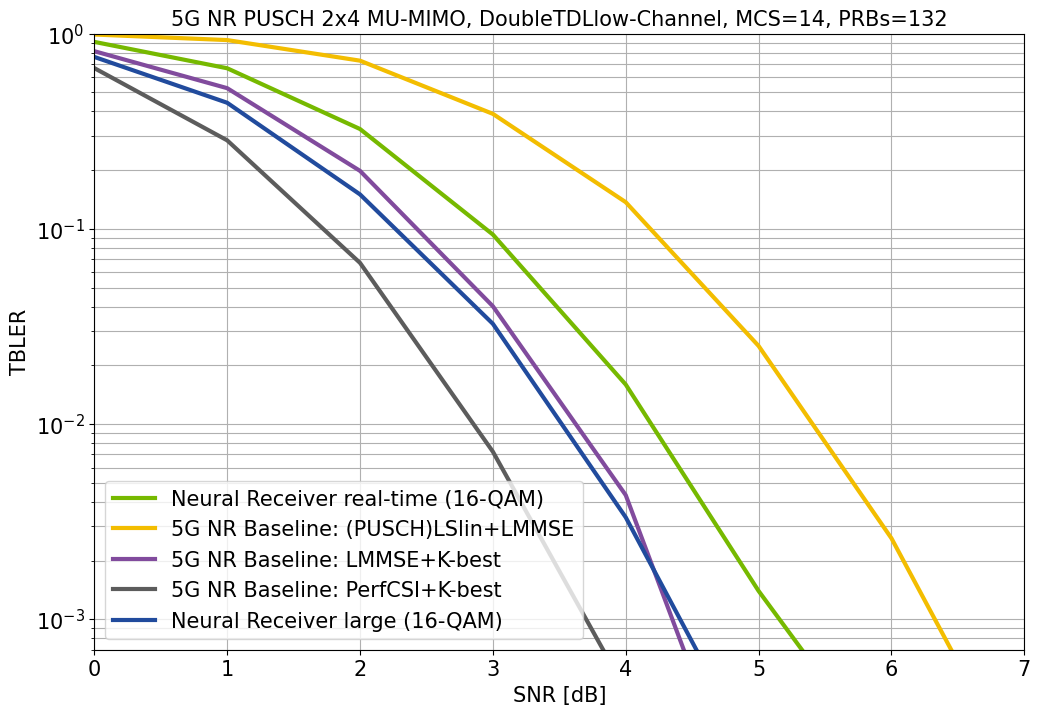

In [2]:
num_tx_eval = 2 # depends on what has been evaluated in evaluate.py before
xlim = [0,7]
# generate a new figure and plot the results (incl. the baseline) for "nrx_demo.cfg"
fig = plot_results(config_name="nrx_rt.cfg", num_tx_eval=num_tx_eval, xlim=xlim, ylim=[7e-4,1],
                   labels=["Neural Receiver real-time (16-QAM)", "5G NR Baseline: (PUSCH)LSlin+LMMSE","5G NR Baseline: LMMSE+K-best", "5G NR Baseline: PerfCSI+K-best",]);

# we can now add additional results in the same figure
# in this case we add the results from nrx_demo_large.cfg, i.e., a NRX with more parameters
fig = plot_results(fig=fig, config_name="nrx_large.cfg", num_tx_eval=num_tx_eval,
             xlim=xlim, ylim=[7e-4,1], color_offset=4, labels=["Neural Receiver large (16-QAM)"]);


In [3]:
# let's assume we want to only plot the NRX and the perfect CSI curve from the nrx_demo.cfg
# we set the sim_idx to 0 which selects the NRX BLER curve
# and let's add only the perfect CSI (sim_idx=3)

# uncomment line below to plot
# plot_results(config_name="nrx_rt.cfg", num_tx_eval=2, sim_idx=[0,3]);

## Plotting the Goodput of the system

To compare systems with different rates and a different DMRS overhead, the goodput can be an interesting metric.
See [notebook on end-to-end learning](e2e_pilotless_communications.ipynb) for further details.

Remark: the goodput is derived from the BLER results and the underlying system configuration.

Evaluating the first 2 port sets
Loading DoubleTDL with low correlation.
Evaluating the first 2 port sets
Loading DoubleTDL with low correlation.


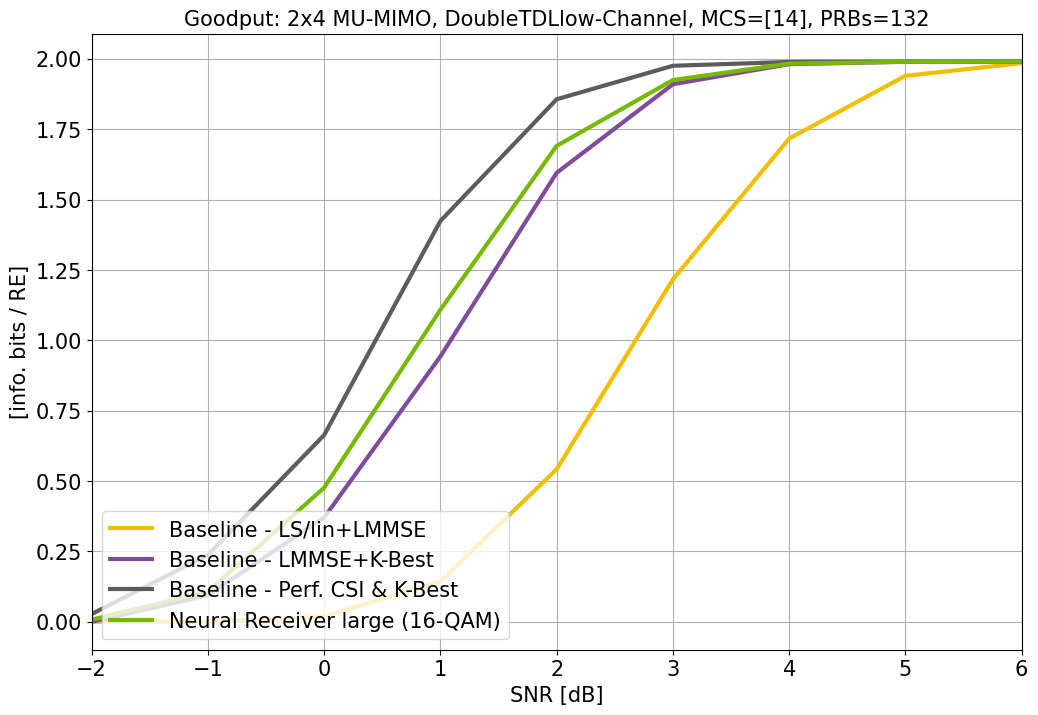

In [4]:
fig = plot_gp(config_name="nrx_rt.cfg", sim_idx=[1,2,3]); # sim_idx=[0] plots the NRX RT
plot_gp(config_name="nrx_large.cfg", sim_idx=[0], fig=fig, labels=["Neural Receiver large (16-QAM)"]);